In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cd/users/prave/datasets/csv files/IPL Winner Prediction

C:\users\prave\datasets\csv files\IPL Winner Prediction


In [3]:
ball=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
match=pd.read_csv('IPL_Matches_2008_2022.csv')

### Data exploration

In [4]:
print("Ball data size : {}".format(ball.shape))
print('Matches data size : {}'.format(match.shape))

Ball data size : (225954, 17)
Matches data size : (950, 20)


In [5]:
ball.head(3)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [7]:
ball.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,225954.0,832047.003257,337954.245970,335982.0,501262.0,829737.0,1178395.0,1312200.0
innings,225954.0,1.483868,0.503104,1.0,1.0,1.0,2.0,6.0
overs,225954.0,9.185679,5.681797,0.0,4.0,9.0,14.0,19.0
ballnumber,225954.0,3.619750,1.810633,1.0,2.0,4.0,5.0,10.0
batsman_run,225954.0,1.243523,1.618166,0.0,0.0,1.0,1.0,6.0
extras_run,225954.0,0.066907,0.341470,0.0,0.0,0.0,0.0,7.0
total_run,225954.0,1.310430,1.606050,0.0,0.0,1.0,1.0,7.0
non_boundary,225954.0,0.000093,0.009640,0.0,0.0,0.0,0.0,1.0
isWicketDelivery,225954.0,0.049351,0.216600,0.0,0.0,0.0,0.0,1.0


In [8]:
match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [9]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [10]:
match.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,950.0,830485.247368,337567.829494,335982.0,501261.25,829738.0,1175371.75,1312200.0
Margin,932.0,17.056867,21.633109,1.0,6.00,8.0,19.00,146.0


## Exploratory Data Analysis(EDA)

In [11]:
# checking Null Values
(ball.isna().sum()/len(ball)*100).sort_values(ascending=False)

fielders_involved    96.464767
kind                 95.064925
player_out           95.064925
extra_type           94.667499
ID                    0.000000
extras_run            0.000000
isWicketDelivery      0.000000
non_boundary          0.000000
total_run             0.000000
batsman_run           0.000000
innings               0.000000
non-striker           0.000000
bowler                0.000000
batter                0.000000
ballnumber            0.000000
overs                 0.000000
BattingTeam           0.000000
dtype: float64

In [12]:
# Removing columns having more than 90% nan values
ball.drop(['fielders_involved','kind','player_out','extra_type'],axis=1,inplace=True)

In [13]:
match.isna().sum().sort_values(ascending=False)

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

### Total  score

In [14]:
total_score=ball.groupby(['ID','innings'])['total_run'].sum().reset_index()
total_score.head()

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


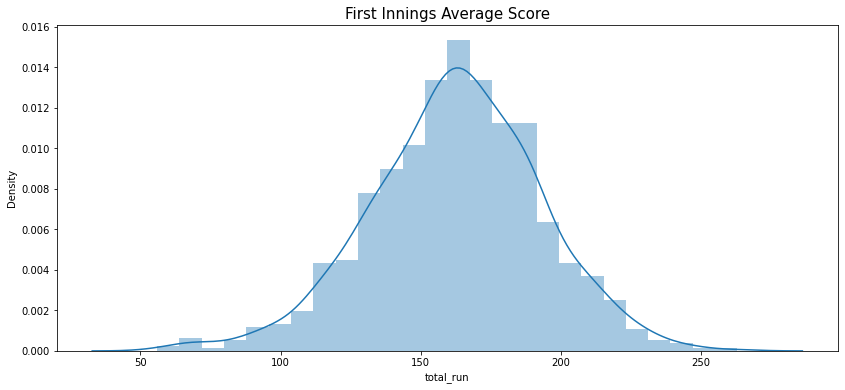

In [15]:
# plotting average of First Innings Score 
first_inning_score=total_score[total_score['innings']==1]

plt.figure(figsize=(14,6))
sns.distplot(first_inning_score['total_run'])
plt.title('First Innings Average Score',fontsize=15)
plt.show()

In [16]:
# I need only First Innings Score 
total_score=total_score[total_score['innings']==1]

# add "target" column in total_score
total_score['Target']=total_score['total_run']+1

**Merge Target Column in Match dataset**

In [17]:
match_df=match.merge(total_score[['ID','Target']],on='ID')

In [18]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


### Remove Old Names And Update New Names  of Teams

In [19]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [20]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [21]:
match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2']=match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['WinningTeam']=match_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1']=match_df['Team1'].str.replace('Deccan Chargers' ,'Sunrisers Hyderabad')
match_df['Team2']=match_df['Team2'].str.replace('Deccan Chargers' ,'Sunrisers Hyderabad')
match_df['WinningTeam']=match_df['WinningTeam'].str.replace('Deccan Chargers' ,'Sunrisers Hyderabad')

match_df['Team1']=match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2']=match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['WinningTeam']=match_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

In [22]:
match_df=match_df[match_df['Team1'].isin(teams)]
match_df=match_df[match_df['Team2'].isin(teams)]
match_df=match_df[match_df['WinningTeam'].isin(teams)]

In [23]:
ball['BattingTeam']=ball['BattingTeam'].str.replace('Deccan Chargers' ,'Sunrisers Hyderabad')
ball['BattingTeam']=ball['BattingTeam'].str.replace('Kings XI Punjab' ,'Punjab Kings')
ball['BattingTeam']=ball['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

ball=ball[ball['BattingTeam'].isin(teams)]

In [24]:
match_df.shape

(832, 21)

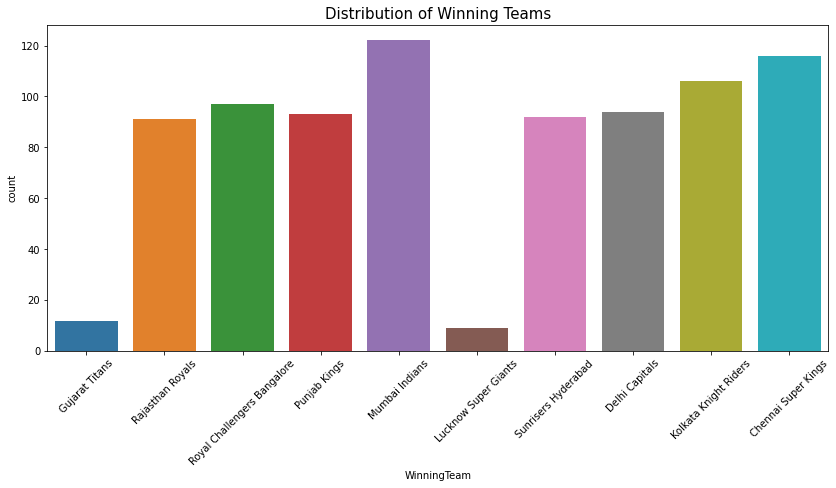

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(match_df['WinningTeam'])
plt.title('Distribution of Winning Teams',fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [26]:
match_df=match_df[['ID','Team1','Team2','City','WinningTeam','Target']].dropna()

In [27]:
# lets merge some columns from match_df into ball_df
ball_df=match_df.merge(ball,on='ID')

In [28]:
ball_df.head(3)

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
1,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,Rajasthan Royals
2,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,Rajasthan Royals


In [29]:
ball_df.drop(['batter','bowler','non-striker','batsman_run','extras_run'],axis=1,inplace=True)

### Now we need to focus on Second Innings only

In [30]:
ball_df=ball_df[ball_df['innings']==2]
ball_df.head()

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,total_run,non_boundary,isWicketDelivery,BattingTeam
120,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,1,0,0,0,Gujarat Titans
121,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,2,0,0,0,Gujarat Titans
122,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,3,1,0,0,Gujarat Titans
123,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,4,0,0,0,Gujarat Titans
124,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,5,0,0,0,Gujarat Titans


In [31]:
ball_df.shape

(89935, 13)

In [32]:
ball_df['current_score']=ball_df.groupby(['ID'])['total_run'].cumsum()
ball_df.head(3)

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,total_run,non_boundary,isWicketDelivery,BattingTeam,current_score
120,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,1,0,0,0,Gujarat Titans,0
121,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,2,0,0,0,Gujarat Titans,0
122,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,3,1,0,0,Gujarat Titans,1


In [33]:
ball_df['runs_left']=np.where(ball_df['Target']-ball_df['current_score']>=0,ball_df['Target']-ball_df['current_score'],0)
ball_df.head()

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,total_run,non_boundary,isWicketDelivery,BattingTeam,current_score,runs_left
120,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,1,0,0,0,Gujarat Titans,0,131
121,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,2,0,0,0,Gujarat Titans,0,131
122,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,3,1,0,0,Gujarat Titans,1,130
123,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,4,0,0,0,Gujarat Titans,1,130
124,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,5,0,0,0,Gujarat Titans,1,130


In [34]:
ball_df['wickets_left']=10-ball_df.groupby(['ID'])['isWicketDelivery'].cumsum()

In [35]:
ball_df['balls_left']=np.where(120-ball_df['overs']*6-ball_df['ballnumber']>=0,120-ball_df['overs']-ball_df['ballnumber'],0)


In [36]:
ball_df['current_run_rate']=(ball_df['current_score']*6/(120-ball_df['balls_left']))

In [37]:
ball_df['required_run_rate']=np.where(ball_df['balls_left']>0,
                                      (ball_df['runs_left']*6)/ball_df['balls_left'],0)

In [38]:
ball_df.head()

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,total_run,non_boundary,isWicketDelivery,BattingTeam,current_score,runs_left,wickets_left,balls_left,current_run_rate,required_run_rate
120,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,1,0,0,0,Gujarat Titans,0,131,10,119,0.0,6.605042
121,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,2,0,0,0,Gujarat Titans,0,131,10,118,0.0,6.661017
122,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,3,1,0,0,Gujarat Titans,1,130,10,117,2.0,6.666667
123,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,4,0,0,0,Gujarat Titans,1,130,10,116,1.5,6.724138
124,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,5,0,0,0,Gujarat Titans,1,130,10,115,1.2,6.782609


In [39]:
id1=ball_df[ball_df['Team1']==ball_df['BattingTeam']]['Team2'].index
id2=ball_df[ball_df['Team2']==ball_df['BattingTeam']]['Team1'].index

In [40]:
def result(row):
    return 1 if row['BattingTeam']==row['WinningTeam'] else 0
ball_df['result']=ball_df.apply(result,axis=1)

In [41]:
ball_df.loc[id1,'BowlingTeam']=ball_df.loc[id1,'Team2']
ball_df.loc[id2,'BowlingTeam']=ball_df.loc[id2,'Team1']
ball_df.head()

,ID,Team1,Team2,City,WinningTeam,Target,innings,overs,ballnumber,total_run,...,isWicketDelivery,BattingTeam,current_score,runs_left,wickets_left,balls_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,1,0,...,0,Gujarat Titans,0,131,10,119,0.0,6.605042,1,Rajasthan Royals
121,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,2,0,...,0,Gujarat Titans,0,131,10,118,0.0,6.661017,1,Rajasthan Royals
122,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,3,1,...,0,Gujarat Titans,1,130,10,117,2.0,6.666667,1,Rajasthan Royals
123,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,4,0,...,0,Gujarat Titans,1,130,10,116,1.5,6.724138,1,Rajasthan Royals
124,1312200,Rajasthan Royals,Gujarat Titans,Ahmedabad,Gujarat Titans,131,2,0,5,0,...,0,Gujarat Titans,1,130,10,115,1.2,6.782609,1,Rajasthan Royals


### Final dataframe to predict 

In [42]:
final_df=ball_df[['BattingTeam','BowlingTeam','City','Target','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','result']]
final_df.head()

,BattingTeam,BowlingTeam,City,Target,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,131,119,10,0.0,6.605042,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,131,118,10,0.0,6.661017,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,117,10,2.0,6.666667,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,116,10,1.5,6.724138,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,130,115,10,1.2,6.782609,1


### category Encoding

In [43]:
final_df=pd.get_dummies(columns=['BattingTeam','BowlingTeam','City'],data=final_df)

In [44]:
final_df.head()

,Target,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BattingTeam_Chennai Super Kings,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Titans,...,City_Kolkata,City_Mumbai,City_Nagpur,City_Navi Mumbai,City_Port Elizabeth,City_Pune,City_Raipur,City_Ranchi,City_Sharjah,City_Visakhapatnam
120,131,131,119,10,0.0,6.605042,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
121,131,131,118,10,0.0,6.661017,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
122,131,130,117,10,2.0,6.666667,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
123,131,130,116,10,1.5,6.724138,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,131,130,115,10,1.2,6.782609,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [45]:
X=final_df.drop('result',axis=1)
y=final_df['result']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [47]:
# feature scalling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,ShuffleSplit

In [49]:
X_train.shape

(67451, 56)

In [51]:
# usong GridSearch to find best algorithm
def find_best_model(X,y):
    models={'logisticregression':{'model':LogisticRegression(solver='lbfgs',multi_class='auto'),'parameters':{'C':[1,5,10,15]}},
           'random_forest':{'model':RandomForestClassifier(criterion='gini'),'parameters':{'n_estimators':[1,5,7,10,50,100,200]}}}
    scores=[]
    cv_shuffle=ShuffleSplit(n_splits=5,random_state=0)
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameters'],cv=cv_shuffle,return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':model_name,'best_parameters':gs.best_params_,'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])
find_best_model(X_train,y_train)

,model,best_parameters,score
0,logisticregression,{'C': 10},0.800385
1,random_forest,{'n_estimators': 200},0.996087


In [52]:
# Using cross_validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestClassifier(n_estimators=200),X_train,y_train,cv=5)
print("Average score: {}".format(round(score.mean(),3)))

Average score: 0.995


In [53]:
# creating randomforest model
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

# Model Evaluation

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

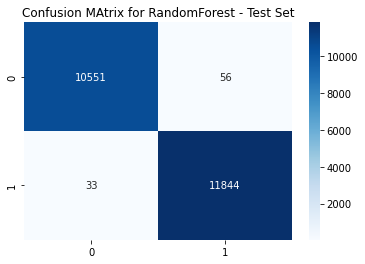

In [58]:
pred_rf=rf.predict(X_test)
cf=confusion_matrix(y_test,pred_rf)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion MAtrix for RandomForest - Test Set')
plt.show()

In [62]:
# Test accuracy score
score=round(accuracy_score(y_test,pred_rf),3)
print("Accuracy score on the test : {}".format(score))

Accuracy score on the test : 0.996


In [63]:
# classification report
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     10607
           1       1.00      1.00      1.00     11877

    accuracy                           1.00     22484
   macro avg       1.00      1.00      1.00     22484
weighted avg       1.00      1.00      1.00     22484



In [65]:
import pickle
pickle.dump(rf,open('IPL_rf.pkl','wb'))